In [50]:
try:
    import geomdl
    import shapely
except:
    !pip3 install geomdl
    !pip3 install shapely

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 12.8 MB/s eta 0:00:00MB/s eta 0:00:01:01


In [51]:
from geomdl import BSpline

# Create the curve instance
crv = BSpline.Curve()

# Set degree
crv.degree = 2

# Set control points
crv.ctrlpts = [[1, 0, 0], [1, 1, 0], [0, 1, 0]]

# Set knot vector
crv.knotvector = [0, 0, 0, 1, 1, 1]

In [190]:
from geomdl import NURBS

# Create a 3-dimensional B-spline Curve
curve = NURBS.Curve()

# Set degree
curve.degree = 2

# Set control points (weights vector will be 1 by default)
# Use curve.ctrlptsw is if you are using homogeneous points as Pw
# let's vary each point in 1000 * 8
# 6 CP
curve.ctrlpts =[[-0.7, 0.7, 0], [0, 0.7, 0], [0.7, 0.7, 0], [0.7, 0, 0], [0.7, -0.7, 0], [-0.7, 0, 0],[-0.7,-0.7,0],[-0.7,0,0],[-0.7, 0.7, 0]]
# 9th control point is same as first control point 
# let's vary the radius between 0.01 and 0.7 in magnitude and angle theta about -10 to 10 degrees and produce 
# 60000 samples 
# Set knot vector
# this is fixed
curve.knotvector = [0, 0,0,0.14285714,0.28571429,0.42857143,0.57142857,0.71428571,0.85714286,1, 1, 1]
# setting this value such that it is not small
# Set evaluation delta (controls the number of curve points)
curve.delta = 0.003

# Get curve points (the curve will be automatically evaluated)
curve_points = curve.evalpts

In [192]:
# help function
import numpy as np

# Create an array with values from 0 to 1 with 6 equal increments
array_values = np.linspace(0, 1, 8)

print(array_values)


[0.         0.14285714 0.28571429 0.42857143 0.57142857 0.71428571
 0.85714286 1.        ]


In [193]:
curve_points 

[[-0.7, 0.7, 0.0],
 [-0.6706375193806634, 0.7, 0.0],
 [-0.6415862232816901, 0.7000000000000001, 0.0],
 [-0.6128461117030796, 0.7, 0.0],
 [-0.5844171846448322, 0.7, 0.0],
 [-0.556299442106948, 0.7000000000000001, 0.0],
 [-0.5284928840894269, 0.7, 0.0],
 [-0.5009975105922689, 0.7000000000000001, 0.0],
 [-0.4738133216154738, 0.7, 0.0],
 [-0.44694031715904187, 0.7, 0.0],
 [-0.4203784972229731, 0.7, 0.0],
 [-0.3941278618072673, 0.7, 0.0],
 [-0.36818841091192467, 0.7, 0.0],
 [-0.3425601445369451, 0.7, 0.0],
 [-0.3172430626823286, 0.7, 0.0],
 [-0.2922371653480751, 0.7, 0.0],
 [-0.26754245253418474, 0.7, 0.0],
 [-0.24315892424065758, 0.7, 0.0],
 [-0.21908658046749327, 0.7, 0.0],
 [-0.19532542121469224, 0.7, 0.0],
 [-0.17187544648225417, 0.7, 0.0],
 [-0.14873665627017923, 0.7, 0.0],
 [-0.12590905057846732, 0.7, 0.0],
 [-0.10339262940711853, 0.7, 0.0],
 [-0.08118739275613288, 0.7000000000000001, 0.0],
 [-0.059293340625510144, 0.6999999999999998, 0.0],
 [-0.03771047301525062, 0.7000000000000001, 

Signed distance for the point: 0.02099999999999999


/var/folders/m3/rn6xb5t95rj5t6lcpmbqlf1h0000gn/T/ipykernel_99477/3769652559.py:26: RuntimeWarning: invalid value encountered in scalar divide
  b = w - e * np.clip(np.dot(w, e) / np.dot(e, e), 0.0, 1.0)


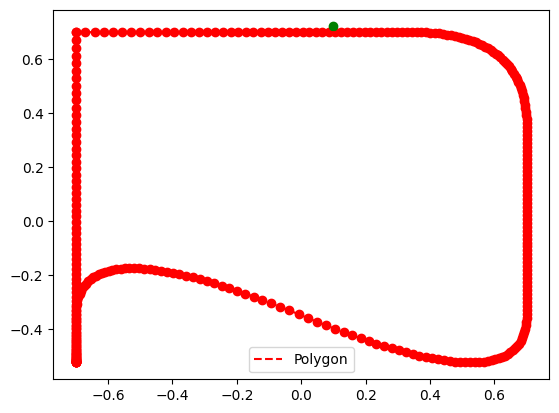

In [194]:
# 
import numpy as np
def signed_distance_polygon(point, polygon_vertices):
    """
    Calculate the signed distance from a point to a convex polygon.

    Parameters:
    - point: NumPy array of shape (2,) representing the point
    - polygon_vertices: NumPy array of shape (num_vertices, 2) representing the vertices of the convex polygon

    Returns:
    - Signed distance from the point to the polygon
    """
    num_vertices = polygon_vertices.shape[0]

    # Initialize variables
    d = np.inf
    s = 1.0

    for i in range(num_vertices):
        j = (i - 1) % num_vertices
        e = polygon_vertices[j] - polygon_vertices[i]
        w = point - polygon_vertices[i]

        # Calculate the perpendicular distance
        b = w - e * np.clip(np.dot(w, e) / np.dot(e, e), 0.0, 1.0)
        d = min(d, np.linalg.norm(b))

        # Determine the sign based on winding number
        if (polygon_vertices[i, 1] <= point[1] < polygon_vertices[j, 1]) or (polygon_vertices[j, 1] <= point[1] < polygon_vertices[i, 1]):
            if polygon_vertices[i, 1] <= point[1] < polygon_vertices[j, 1]:
                if e[0] * w[1] > e[1] * w[0]:
                    s = -s
            elif polygon_vertices[j, 1] <= point[1] < polygon_vertices[i, 1]:
                if e[0] * w[1] < e[1] * w[0]:
                    s = -s

    return s * d



# Example usage:
# Convert to 2D points and arrange in the acceptable form
polygon_vertices = np.array([(x, y) for x, y, _ in curve_points])
point = np.array([0.1, 0.721])

signed_distance = signed_distance_polygon(point, polygon_vertices)
print("Signed distance for the point:", signed_distance)

# Extract x, y coordinates from the curve points
x_coords = [point[0] for point in curve_points]
y_coords = [point[1] for point in curve_points]

# Plot the polygon
plt.plot(x_coords, y_coords, label="Polygon", linestyle="--", color="red")
plt.scatter(x_coords, y_coords, color="red")  # Optionally, plot polygon points
plt.scatter(point[0], point[1], color="green")  # the point
plt.legend()
plt.show()

In [195]:
# this works 
# Convert to 2D points and arrange in the acceptable form
import time
polygon_vertices = np.array([(x, y) for x, y, _ in curve_points])

# Create a 256x256 grid
x = np.linspace(-1, 1, 256)
y = np.linspace(-1, 1, 256)
xx, yy = np.meshgrid(x, y)
grid_points = np.column_stack((xx.flatten(), yy.flatten()))

# Compute signed distances for the grid points
signed_distances = np.zeros_like(grid_points[:, 0])
start_time = time.time()
for i in range(grid_points.shape[0]):
    point = grid_points[i]
    signed_distance = signed_distance_polygon(point, polygon_vertices)
    signed_distances[i] = signed_distance
end_time = time.time()
print(start_time-end_time)
# Reshape the signed distances into a 256x256 grid
signed_distances_grid = signed_distances.reshape(512, 512)

# Visualize the results
plt.imshow(signed_distances_grid, cmap='viridis', extent=(-1, 1, -1, 1))
plt.colorbar()
plt.title('Signed Distances to Polygon')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

/var/folders/m3/rn6xb5t95rj5t6lcpmbqlf1h0000gn/T/ipykernel_99477/3769652559.py:26: RuntimeWarning: invalid value encountered in scalar divide
  b = w - e * np.clip(np.dot(w, e) / np.dot(e, e), 0.0, 1.0)


-198.44713687896729


ValueError: cannot reshape array of size 65536 into shape (512,512)

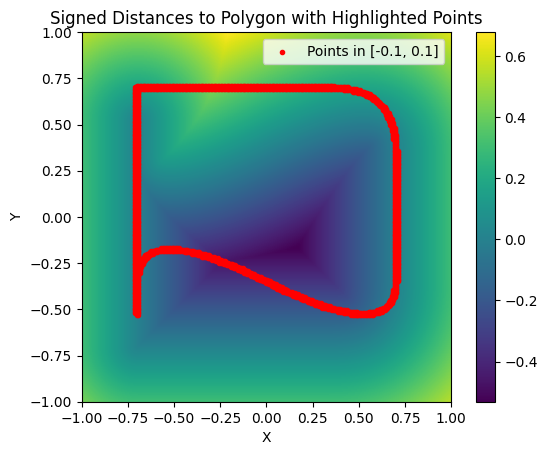

In [188]:
# Visualize the results with signed distances between -0.1 and 0.1
plt.imshow(signed_distances_grid, cmap='viridis', extent=(-1, 1, -1, 1))
plt.colorbar()

# Highlight points with signed distances between -0.1 and 0.1
highlighted_points = grid_points[(signed_distances > -0.01) & (signed_distances < 0.01)]
plt.scatter(highlighted_points[:, 0], highlighted_points[:, 1], c='red', marker='.', label='Points in [-0.1, 0.1]')

plt.title('Signed Distances to Polygon with Highlighted Points')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()